In [20]:
from pathmodels.find import find_pilot_mouse_dirs 
from pathlib import Path
import pandas as pd
import numpy as np
from spiketimes.df.binning import which_bin
import seaborn as sns

In [21]:
p = Path(r"E:\pilot\data\proper")
mouse_dirs = find_pilot_mouse_dirs(p)

c:\users\roryl\repos\pathmodels\pathmodels\base\data_dirs.py:130: UserWarning: Could not find video file <Cylander Behaviour Dir E:\pilot\data\proper\B57421\day2_noon\cylander_behaviour>
  warnings.warn(f"Could not find video file {self}")
c:\users\roryl\repos\pathmodels\pathmodels\base\data_dirs.py:153: UserWarning: Could not find events file <Cylander Behaviour Dir E:\pilot\data\proper\B57421\day2_noon\cylander_behaviour>
  warnings.warn(f"Could not find events file {self}")
c:\users\roryl\repos\pathmodels\pathmodels\base\data_dirs.py:142: UserWarning: Could not find frame timestamps file: <Cylander Behaviour Dir E:\pilot\data\proper\B57421\day2_noon\cylander_behaviour>
  warnings.warn(f"Could not find frame timestamps file: {self}")
c:\users\roryl\repos\pathmodels\pathmodels\base\data_dirs.py:173: UserWarning: Could not find trajectory file
  warnings.warn("Could not find trajectory file")


In [22]:
blocks = np.arange(7) * 120

In [23]:
session = "day3-test1"

day3_dfs = []
for mouse_dir in mouse_dirs:
    session_dir = mouse_dir.session_dirs[session]
    data_dir = session_dir.data_dirs["cylander_behaviour"]
    df = pd.read_hdf(data_dir.dlc_trajectory_file)
    df = df.assign(session=session, mouse=mouse_dir.mouse.name, time=lambda x: x.frame.divide(30))

    df = which_bin(
        df, bin_edges=blocks, spiketimes_col="time"
        )
    df = df.rename(
        columns={"bin_idx": "block_number", "bin_values":"block_start"}
    )
    df = df.assign(context=np.where(df["block_number"] % 2 == 0, "safe", "danger"))
    day3_dfs.append(df)

df_day3 = pd.concat(day3_dfs).assign(session=session)

In [24]:
session = "day4-test2"

day4_dfs = []
for mouse_dir in mouse_dirs:
    session_dir = mouse_dir.session_dirs[session]
    data_dir = session_dir.data_dirs["cylander_behaviour"]
    df = pd.read_hdf(data_dir.dlc_trajectory_file)
    df = df.assign(session=session, mouse=mouse_dir.mouse.name, time=lambda x: x.frame.divide(30))

    df = which_bin(
        df, bin_edges=blocks, spiketimes_col="time"
        )
    df = df.rename(
        columns={"bin_idx": "block_number", "bin_values":"block_start"}
    )
    df = df.assign(context=np.where(df["block_number"] % 2 == 1, "safe", "danger"))
    df.loc[lambda x: x.block_start == 600, "context"] = "mixed"
    day4_dfs.append(df)

df_day4 = pd.concat(day4_dfs).assign(session=session)

In [25]:
df_groups = pd.read_excel(r"E:\pilot\pilot groups.xlsx").rename(columns={"ID":"mouse"})
df = pd.concat([df_day3, df_day4])
df = df[["mouse", "session", "time",  "block_number", "context", "motion", "freeze"]]

In [26]:
df1 = df.groupby(["mouse", "session", "block_number", "context"])["freeze"].mean().reset_index()
df1 = df2.merge(df_groups)

<AxesSubplot:xlabel='block_number', ylabel='freeze'>

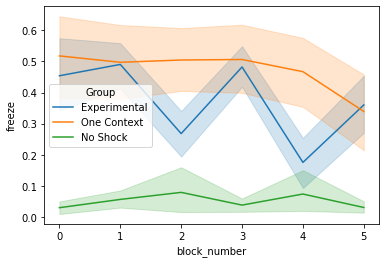

In [27]:
dfp = df1.loc[lambda x: x.session == "day3-test1"]
sns.lineplot(data=dfp, x="block_number", y="freeze", hue="Group")

<AxesSubplot:xlabel='block_number', ylabel='freeze'>

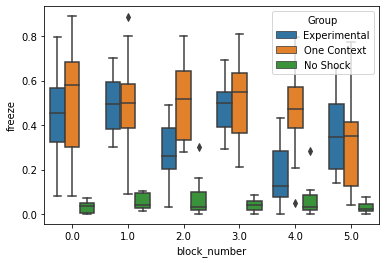

In [28]:
dfp = df1.loc[lambda x: x.session == "day3-test1"]
sns.boxplot(data=dfp, x="block_number", y="freeze", hue="Group")

<AxesSubplot:xlabel='freeze', ylabel='mouse'>

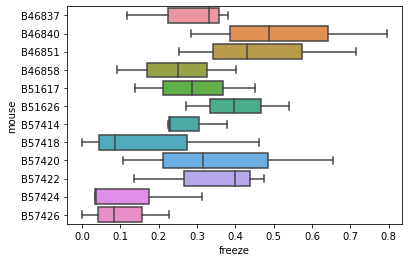

In [29]:
dfp = dfp.loc[lambda x: (x.Group == "Experimental") & (x.context == "safe")]
sns.boxplot(data=dfp, y="mouse", x="freeze")

<AxesSubplot:xlabel='freeze', ylabel='mouse'>

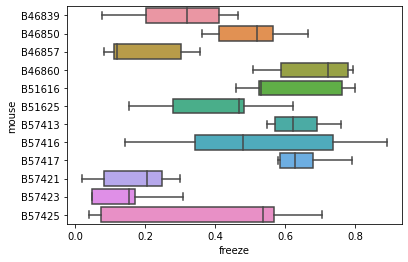

In [30]:
dfp = df2.groupby(["mouse", "context", "Group", "block_number"], as_index=False)["freeze"].mean()
dfp = dfp.loc[lambda x: (x.Group == "One Context") & (x.context == "safe")]
sns.boxplot(data=dfp, y="mouse", x="freeze")

<AxesSubplot:xlabel='freeze', ylabel='mouse'>

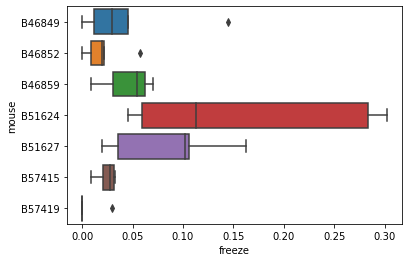

In [31]:
dfp = df2.groupby(["mouse", "context", "Group", "block_number"], as_index=False)["freeze"].mean()
dfp = dfp.loc[lambda x: (x.Group == "No Shock") & (x.context == "safe")]
sns.boxplot(data=dfp, y="mouse", x="freeze")